# Feature Analysis
This section is designed to extract features from the processed dataset for each grid id and analysis the potential feature columns for statistically significant features to predict emmissions.

# Extracting Feature Columns
This section aims to take the joined dataset and aggregate features for each grid id.

## Importing Requirements

In [1]:
# Import Packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns # for data vis
import matplotlib.pyplot as plt # for data vis

# Import Data
data = pd.read_csv('datasets\df_merged_RoadTrafficData_Emissions.csv', encoding='utf-8')

## Converting Discrete Columns into Machine Learning Features
There are a few steps to this process:
- Creating columns that count the number of distinct values for discrete columns
- Using the pandas dummies to create columns that indicate if a grid has a particular discrete value or not

### Getting unique counts

In [2]:
# Count of unique values for discrete columns
data_group_discrete = data.groupby(['rtd_grid_exactcut_id'])[['rtd_toid',
                                                              'rtd_location_exactcut',
                                                              'rtd_boroughname_exactcut',
                                                              'rtd_tlrn',
                                                              'rtd_motorwaynumber']].agg(pd.Series.nunique)
# Add suffix to columns
data_group_discrete = data_group_discrete.add_suffix("_count")
data_group_discrete.head()

,rtd_toid_count,rtd_location_exactcut_count,rtd_boroughname_exactcut_count,rtd_tlrn_count,rtd_motorwaynumber_count
rtd_grid_exactcut_id,,,,,
2.0,43,1,1,1,2
3.0,38,1,1,1,2
7.0,7,1,1,1,1
8.0,8,1,1,1,1
9.0,5,1,1,1,2


## Converting Numeric Columns into Machine Learning Features
For numeric there is only one process and that is take the columns and aggregate in a few different ways. Later on the best type of aggregation can be selected for each column and the rest eliminated

### Aggregating Numeric Columns

In [18]:
# Calculate various aggregations of numerical data
data_group_numeric = data.groupby(['rtd_grid_exactcut_id'])[['rtd_vkm_taxi',
                                                              'rtd_vkm_pcar',
                                                              'rtd_vkm_dcar',
                                                              'rtd_vkm_plgv',
                                                              'rtd_vkm_dlgv',
                                                              'rtd_vkm_ltbus',
                                                              'rtd_vkm_coach',
                                                              'rtd_vkm_rigid2axle',
                                                              'rtd_vkm_rigid3axle',
                                                              'rtd_vkm_rigid4axle',
                                                              'rtd_vkm_artic3axle',
                                                              'rtd_vkm_artic5axle',
                                                              'rtd_vkm_artic6axle',
                                                              'rtd_vkm_electriccar',
                                                              'rtd_vkm_electriclgv',
                                                              'rtd_vkm_total',]].agg(['mean'])

# Tidy up columns names
data_group_numeric.columns = data_group_numeric.columns.map('_'.join)
data_group_numeric.head()

# Get labelled columns to examine
data_group_numeric['total_emissions_co2'] = data[['ebl_ebl_ebl_total_emissions_co2']].sum(axis=1)

data_group_numeric['total_emissions_nox'] = data[['ebl_ebl_ebl_total_emissions_nox',]].sum(axis=1)

data_group_numeric['total_emissions_pm10'] = data[['ebl_ebl_ebl_total_emissions_pm10_brake',
                                                   'ebl_ebl_ebl_total_emissions_pm10_exhaust',
                                                   'ebl_ebl_ebl_total_emissions_pm10_resusp',
                                                   'ebl_ebl_ebl_total_emissions_pm10_tyre']].sum(axis=1)

data_group_numeric['total_emissions_pm25'] = data[['ebl_ebl_ebl_total_emissions_pm25_brake',
                                                   'ebl_ebl_ebl_total_emissions_pm25_exhaust',
                                                   'ebl_ebl_ebl_total_emissions_pm25_resusp',
                                                   'ebl_ebl_ebl_total_emissions_pm25_tyre',]].sum(axis=1)

# Combine
data_group_numeric = pd.concat([data_group_discrete, data_group_numeric], axis=1)
data_group_numeric.head()

,rtd_toid_count,rtd_location_exactcut_count,rtd_boroughname_exactcut_count,rtd_tlrn_count,rtd_motorwaynumber_count,rtd_vkm_taxi_mean,rtd_vkm_pcar_mean,rtd_vkm_dcar_mean,rtd_vkm_plgv_mean,rtd_vkm_dlgv_mean,...,rtd_vkm_artic3axle_mean,rtd_vkm_artic5axle_mean,rtd_vkm_artic6axle_mean,rtd_vkm_electriccar_mean,rtd_vkm_electriclgv_mean,rtd_vkm_total_mean,total_emissions_co2,total_emissions_nox,total_emissions_pm10,total_emissions_pm25
rtd_grid_exactcut_id,,,,,,,,,,,,,,,,,,,,,
2.0,43,1,1,1,2,7736.476518,6.420119e+05,6.008110e+05,5189.178867,1.927423e+05,...,4346.429520,11141.363909,45249.566751,138.951779,36.086668,1.571284e+06,266.236065,0.754553,0.138736,0.055734
3.0,38,1,1,1,2,4083.195323,3.121561e+05,3.442238e+05,3019.673723,1.024740e+05,...,2548.051473,9333.681543,35475.425393,19.823887,4.876138,8.478185e+05,100.869960,0.308273,0.057264,0.021128
7.0,7,1,1,1,1,20636.279686,1.527336e+06,1.790101e+06,15407.475557,5.079129e+05,...,13532.442032,69209.254093,266993.983964,0.000000,0.000000,4.389554e+06,0.000000,0.000000,0.000000,0.000000
8.0,8,1,1,1,1,26457.065473,1.958733e+06,2.295716e+06,21968.914949,7.242131e+05,...,18784.749465,93768.584019,329747.017931,0.000000,0.000000,5.715443e+06,550.012962,1.659651,0.187115,0.081239
9.0,5,1,1,1,2,56207.478132,4.148563e+06,4.862241e+06,42774.648024,1.410081e+06,...,32065.853504,93010.980755,423733.409704,0.041457,0.000000,1.149010e+07,256.420087,0.798780,0.126811,0.049892


# Feature Examination
This section aims to analyse the columns and select the best columns for machine learning model training.

## Correlation Heatmap

total_emissions_co2               1.000000
total_emissions_nox               0.993888
total_emissions_pm25              0.988451
total_emissions_pm10              0.987238
rtd_vkm_ltbus_mean                0.051048
rtd_vkm_electriclgv_mean          0.029051
rtd_vkm_electriccar_mean          0.019482
rtd_vkm_rigid4axle_mean           0.013735
rtd_vkm_rigid2axle_mean           0.009708
rtd_vkm_rigid3axle_mean           0.008742
rtd_vkm_dlgv_mean                 0.008625
rtd_vkm_pcar_mean                 0.006104
rtd_vkm_total_mean                0.004755
rtd_vkm_taxi_mean                 0.004704
rtd_vkm_plgv_mean                 0.004636
rtd_tlrn_count                    0.002916
rtd_vkm_artic3axle_mean           0.002677
rtd_vkm_artic6axle_mean           0.002170
rtd_vkm_dcar_mean                 0.001253
rtd_vkm_artic5axle_mean          -0.000508
rtd_toid_count                   -0.001574
rtd_vkm_coach_mean               -0.001582
rtd_motorwaynumber_count         -0.008657
rtd_locatio

<AxesSubplot:>

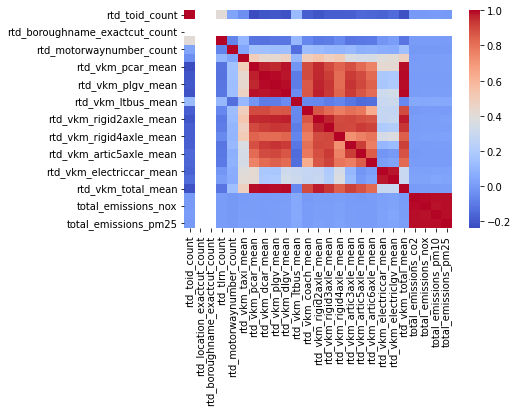

In [19]:
# Generate correlation heatmap
data_corr = data_group_numeric.corr()
print(data_corr['total_emissions_co2'].sort_values(ascending = False),'\n')

sns.heatmap(data_corr, cmap='coolwarm')

### Generating dummies

In [ ]:
# Check whether or not a grid contains any discrete values
dummies_location_exactcut = pd.get_dummies(data['rtd_location_exactcut'], prefix='rtd_location_exactcut')
dummies_boroughname_exactcut = pd.get_dummies(data['rtd_boroughname_exactcut'], prefix='rtd_boroughname_exactcut')
dummies_tlrn = pd.get_dummies(data['rtd_tlrn'], prefix='rtd_tlrn')
dummies_motorwaynumber = pd.get_dummies(data['rtd_motorwaynumber'], prefix='rtd_motorwaynumber')

data_group_dummies = data['rtd_grid_exactcut_id']
data_group_dummies = pd.concat([data_group_dummies, dummies_location_exactcut, dummies_boroughname_exactcut, dummies_tlrn, dummies_motorwaynumber], axis=1)
data_group_dummies = data_group_dummies.groupby(['rtd_grid_exactcut_id']).agg('max')

data_group_dummies.head()


## Normalising all numerical columns
With all columns now in a number form, we can take the columns and normalise them.

In [ ]:
# Normalise count of unique values for discrete columns
for column in data_group_discrete:
    values = data_group_discrete[column].values
    values = values.reshape(-1, 1)
    values_n = preprocessing.MinMaxScaler().fit_transform(values)
    data_group_discrete[column] = pd.DataFrame(values_n)

data_group_discrete.head()

In [ ]:
# Normalise various aggregations of numerical data
for column in data_group_numeric:
    values = data_group_numeric[column].values
    values = values.reshape(-1, 1)
    values_n = preprocessing.MinMaxScaler().fit_transform(values)
    data_group_numeric[column] = pd.DataFrame(values_n)

data_group_numeric.head()

## Compiling the final dataset
The next step is to compile together the final dataset, calculating the labelled columns by taking a total of emissions and joining the transformed columns together in the one dataset.

The final result gives of a table of rows with a unique row per grid id and columns of potential features ready for analysis.

In [ ]:
# Join all Dataframes containing potential features
data_new = pd.concat([data_group_discrete, data_group_dummies, data_group_numeric], axis=1)

# Export final dataset read for Machine Learning examination
data_new.to_csv('datasets\data_transformed.csv')

data_new.head()